In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import integrate
from scipy.integrate import solve_ivp
import sympy
import mpmath
from mpl_toolkits.mplot3d.axes3d import Axes3D
import myastro.orbit as ob
import myastro.coord as co
import myastro.timeutil as tc
from toolz import pipe


Bad key "text.kerning_factor" on line 4 in
/home/anybody/apps/anaconda3/envs/py37astro/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [9]:
x = sympy.symbols("x")
y = sympy.Function("y")
f = y(x)**2 + x

In [10]:
f_np = sympy.lambdify((y(x),x),f)

In [12]:
y0 = 0
xp = np.linspace(0, 1.9, 100)
yp = integrate.odeint(f_np, y0, xp)
xm = np.linspace(0, -5, 100)
ym = integrate.odeint(f_np, y0, xm)

In [24]:
 def plot_direction_field(x, y_x, f_xy, x_lim=(-5, 5), y_lim=(-5, 5), ax=None):
     f_np = sympy.lambdify((x, y_x), f_xy, 'numpy')
     x_vec = np.linspace(x_lim[0], x_lim[1], 20)
     y_vec = np.linspace(y_lim[0], y_lim[1], 20)
     if ax is None:
        _, ax = plt.subplots(figsize=(4, 4))       
     dx = x_vec[1] - x_vec[0]
     dy = y_vec[1] - y_vec[0]

     for m, xx in enumerate(x_vec):
        for n, yy in enumerate(y_vec):
             Dy = f_np(xx, yy) * dx
             Dx = 0.8 * dx**2 / np.sqrt(dx**2 + Dy**2)
             Dy = 0.8 * Dy*dy / np.sqrt(dx**2 + Dy**2)
             ax.plot([xx - Dx/2, xx + Dx/2],[yy - Dy/2, yy + Dy/2], 'b', lw=0.5)
     ax.axis('tight')
     ax.set_title(r"$%s$" % (sympy.latex(sympy.Eq(y(x).diff(x), f_xy))),fontsize=18)
     return ax

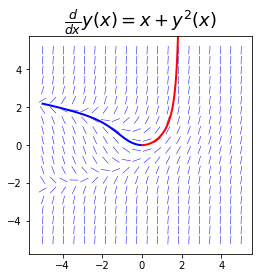

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
plot_direction_field(x, y(x), f, ax=ax)
ax.plot(xm, ym, 'b', lw=2)
ax.plot(xp, yp, 'r', lw=2)

In [26]:
a, b, c, d = 0.4, 0.002, 0.001, 0.7
def f(xy, t):
    x, y = xy
    return [a * x - b * x * y, c * x * y - d * y]

In [27]:
xy0 = [600, 400]
t = np.linspace(0, 50, 250)
xy_t = integrate.odeint(f, xy0, t)

In [28]:
xy_t.shape

(250, 2)

In [29]:
def f(t, y, args):
    m1, k1, g1, m2, k2, g2 = args
    return [y[1], - k1/m1 * y[0] + k2/m1 * (y[2] - y[0]) -g1/m1 * y[1], y[3], - k2/m2 * (y[2] - y[0]) - g2/m2 * y[3]]

In [30]:
m1, k1, g1 = 1.0, 10.0, 0.5
m2, k2, g2 = 2.0, 40.0, 0.25
args = (m1, k1, g1, m2, k2, g2)
y0 = [1.0, 0, 0.5, 0]
t = np.linspace(0, 20, 1000)

In [31]:
r = integrate.ode(f)

In [32]:
r.set_integrator('lsoda')
r.set_initial_value(y0, t)
r.set_f_params(args)

SyntaxError: invalid syntax (<ipython-input-32-bf6fdb0bc2b8>, line 3)

In [2]:
import numpy as np
from scipy.integrate import solve_ivp

In [3]:
sol = solve_ivp(lambda t, y: t-y, [0, 15], [2])

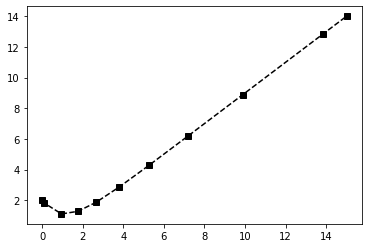

In [4]:
plt.plot(sol.t, sol.y[0], 'k--s')


In [50]:
sol.success

True

In [52]:
t_mjd = pipe(co.epochformat2jd("2020.05.13.5"),tc.jd2mjd)
print (t_mjd)
r_venus, v_venus = ob.planet_helioeclipt_rv("Venus",t_mjd)

58982.5


In [53]:
a_venus = ob.calc_accelaration(t_mjd,r_venus)

In [54]:
a_venus

array([ 3.35866638e-04,  4.63490039e-04, -1.30506670e-05])

In [55]:
def my_f(t,y):
    acc = ob.calc_accelaration(t,y[0:3])
    return np.concatenate((y[3:6],acc))
    #return np.array([v1,v2,v3,acc[0],acc[1],acc[2]])                               

In [56]:
y0 = np.array([r_venus[0],r_venus[1],r_venus[2],v_venus[0],v_venus[1],v_venus[2]])
y0 = np.concatenate((r_venus,v_venus))


In [57]:
sol = solve_ivp(my_f,(t_mjd,t_mjd+500),y0)

In [27]:
a = np.array([0,1,2,3,4,5])

In [34]:
a[3:6]

array([3, 4, 5])

In [35]:
np.concatenate((a[3:6],a[0:3]))

array([3, 4, 5, 0, 1, 2])

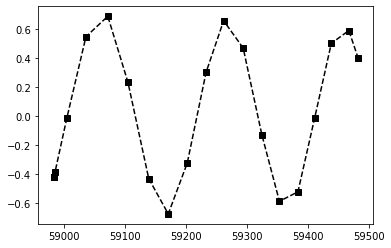

In [48]:
plt.plot(sol.t, sol.y[0], 'k--s')

In [58]:
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 116
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([58982.5       , 58982.69463174, 58984.64094914, 59004.10412312,
       59035.52136368, 59071.41046562, 59104.51932098, 59138.6965941 ,
       59170.74162723, 59201.95634269, 59232.90889038, 59261.71915742,
       59293.83006402, 59324.59607838, 59353.36065734, 59383.76932541,
       59411.2487118 , 59438.59445994, 59467.38578135, 59482.5       ])
 t_events: None
        y: array([[-4.21742867e-01, -4.18543847e-01, -3.85875427e-01,
        -1.30119291e-02,  5.48556909e-01,  6.89722778e-01,
         2.34765298e-01, -4.29955274e-01, -6.73029598e-01,
        -3.22282972e-01,  3.03669914e-01,  6.58892008e-01,
         4.70456332e-01, -1.29000712e-01, -5.85903225e-01,
        -5.20890904e-01, -1.15563895e-02,  5.02732555e-01,
         5.91066938e-01,  4.03946229e-01],
       [-5.81981354e-01, -5.84306603e-01,

In [64]:
sol.t

array([58982.5       , 58982.69463174, 58984.64094914, 59004.10412312,
       59035.52136368, 59071.41046562, 59104.51932098, 59138.6965941 ,
       59170.74162723, 59201.95634269, 59232.90889038, 59261.71915742,
       59293.83006402, 59324.59607838, 59353.36065734, 59383.76932541,
       59411.2487118 , 59438.59445994, 59467.38578135, 59482.5       ])

In [61]:
sol.y.shape

(6, 20)

In [62]:
sol.y

array([[-4.21742867e-01, -4.18543847e-01, -3.85875427e-01,
        -1.30119291e-02,  5.48556909e-01,  6.89722778e-01,
         2.34765298e-01, -4.29955274e-01, -6.73029598e-01,
        -3.22282972e-01,  3.03669914e-01,  6.58892008e-01,
         4.70456332e-01, -1.29000712e-01, -5.85903225e-01,
        -5.20890904e-01, -1.15563895e-02,  5.02732555e-01,
         5.91066938e-01,  4.03946229e-01],
       [-5.81981354e-01, -5.84306603e-01, -6.06578458e-01,
        -7.20708708e-01, -4.71213698e-01,  2.06875521e-01,
         6.66456759e-01,  5.37583519e-01, -6.26839316e-02,
        -5.91276480e-01, -6.02109273e-01, -1.39424988e-01,
         4.76525115e-01,  6.44508714e-01,  2.64949144e-01,
        -3.63578564e-01, -6.31608749e-01, -3.79515592e-01,
         2.13182434e-01,  4.77635213e-01],
       [ 1.63870986e-02,  1.61707108e-02,  1.39810903e-02,
        -9.09654851e-03, -3.80960972e-02, -3.69776326e-02,
        -4.44211861e-03,  3.21583164e-02,  3.79841815e-02,
         1.05197742e-02, -2.5

In [65]:
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 116
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([58982.5       , 58982.69463174, 58984.64094914, 59004.10412312,
       59035.52136368, 59071.41046562, 59104.51932098, 59138.6965941 ,
       59170.74162723, 59201.95634269, 59232.90889038, 59261.71915742,
       59293.83006402, 59324.59607838, 59353.36065734, 59383.76932541,
       59411.2487118 , 59438.59445994, 59467.38578135, 59482.5       ])
 t_events: None
        y: array([[-4.21742867e-01, -4.18543847e-01, -3.85875427e-01,
        -1.30119291e-02,  5.48556909e-01,  6.89722778e-01,
         2.34765298e-01, -4.29955274e-01, -6.73029598e-01,
        -3.22282972e-01,  3.03669914e-01,  6.58892008e-01,
         4.70456332e-01, -1.29000712e-01, -5.85903225e-01,
        -5.20890904e-01, -1.15563895e-02,  5.02732555e-01,
         5.91066938e-01,  4.03946229e-01],
       [-5.81981354e-01, -5.84306603e-01,

In [67]:
sol.t[19]

59482.5

In [72]:
sol.y[:,19]

array([ 0.40394623,  0.47763521, -0.01678497, -0.01671655,  0.01388303,
        0.00115442])

In [73]:
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 116
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([58982.5       , 58982.69463174, 58984.64094914, 59004.10412312,
       59035.52136368, 59071.41046562, 59104.51932098, 59138.6965941 ,
       59170.74162723, 59201.95634269, 59232.90889038, 59261.71915742,
       59293.83006402, 59324.59607838, 59353.36065734, 59383.76932541,
       59411.2487118 , 59438.59445994, 59467.38578135, 59482.5       ])
 t_events: None
        y: array([[-4.21742867e-01, -4.18543847e-01, -3.85875427e-01,
        -1.30119291e-02,  5.48556909e-01,  6.89722778e-01,
         2.34765298e-01, -4.29955274e-01, -6.73029598e-01,
        -3.22282972e-01,  3.03669914e-01,  6.58892008e-01,
         4.70456332e-01, -1.29000712e-01, -5.85903225e-01,
        -5.20890904e-01, -1.15563895e-02,  5.02732555e-01,
         5.91066938e-01,  4.03946229e-01],
       [-5.81981354e-01, -5.84306603e-01,

In [80]:
idx = len(sol.t) -1
sol.t[idx]
sol.y[:,idx]

array([ 0.40394623,  0.47763521, -0.01678497, -0.01671655,  0.01388303,
        0.00115442])

In [81]:
r_sol = sol.y[:,idx][:3]

In [82]:
v_sol = sol.y[:,idx][3:6]

In [83]:
r_sol

array([ 0.40394623,  0.47763521, -0.01678497])

In [84]:
v_sol

array([-0.01671655,  0.01388303,  0.00115442])

In [2]:
from myastro.cluegen import Datum

class Coordinates(Datum):
    x: int
    y: int

a = Coordinates(2, 3)


In [12]:
step = 2
start = 1
end = 9
samples = 4 + 1
interval = np.linspace(start,end,samples,endpoint=True)
print (interval)

[1. 3. 5. 7. 9.]


In [37]:
def my_range (start, stop, step, include_start = True, include_end = True):
    result = []
    i = 0
    while start + i * step <= stop:
        result.append(start + i * step)
        i += 1
    if include_end :         
        if result[-1] != stop :
            result.append(stop)
    else :
        if result[-1] == stop :
            result = result[:-1]
    if not include_start :         
        result = result[1:]
    return result
    

In [34]:
# init    from to
# intervalo 1  my_range(init,from,step,include_end=False)
# intervalo 2  my_range(from,to,step,include_end=True)

int1 = my_range(3,10,2,include_end=False)
int2 = my_range(10,20,2,include_end=True)
print (int1)
print (int2)

[3, 5, 7, 9]
[10, 12, 14, 16, 18, 20]
None
None


In [30]:
my_range(1,20,2,include_start=False,include_end=True)

[3, 5, 7, 9, 11, 13, 15, 17, 19, 20]


In [41]:
# from    to   init
# intervalo 1  reversed my_range(to,init,step,include_end=True, include_start=False)
# intervalo 2 reversed my_range(from,to, include_end=True

int1 = reversed(my_range(10,20,3,include_start=False, include_end=True))
int2 = reversed(my_range(2,10,2,include_end=True))
print (list(int1))
print (list(int2))


[20, 19, 16, 13]
[10, 8, 6, 4, 2]
